In [5]:
import numpy as np
import matplotlib.pyplot as plt
import librosa as lb
from scipy.fftpack import fft, ifft
import sounddevice as sd
import librosa.display

In [2]:
training_car, sr1 = lb.load("training_car.wav", sr=None)
test_car, sr2 = lb.load("test_car.wav", sr=None)
test_tram, sr3 = lb.load("test_tram.wav", sr=None)

In [19]:
def plot_waveform(audio, sr, title):
    t = np.arange(len(audio)) / sr

    plt.plot(t, audio)
    plt.title(title)
    plt.xlabel("Time (seconds)")
    plt.ylabel("Amplitude")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def plot_mfcc(audio, sr, title, n_mfcc=20):
    mfcc = lb.feature.mfcc(y=audio, sr=sr, n_mfcc=n_mfcc)

    librosa.display.specshow(
        mfcc,
        x_axis="time",
        y_axis="mel",
        sr=sr
    )
    plt.colorbar(label="MFCC coefficient value")
    plt.title(title)
    plt.xlabel("Time (seconds)")
    plt.ylabel("MFCC coefficient index")
    plt.tight_layout()
    plt.show()

def plot_spectrogram(audio, sr, title):
    # STFT
    S = lb.stft(audio)
    S_db = lb.amplitude_to_db(np.abs(S), ref=np.max)

    librosa.display.specshow(
        S_db,
        sr=sr,
        x_axis="time",
        y_axis="hz"
    )
    plt.colorbar(label="Amplitude (dB)")
    plt.title(title)
    plt.xlabel("Time (seconds)")
    plt.ylabel("Frequency (Hz)")
    plt.tight_layout()
    plt.show()

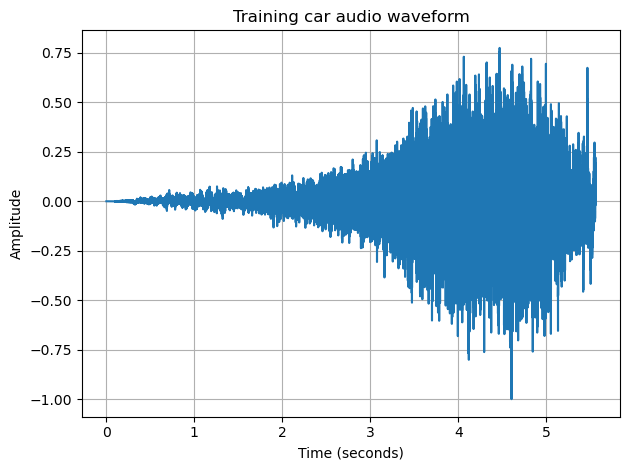

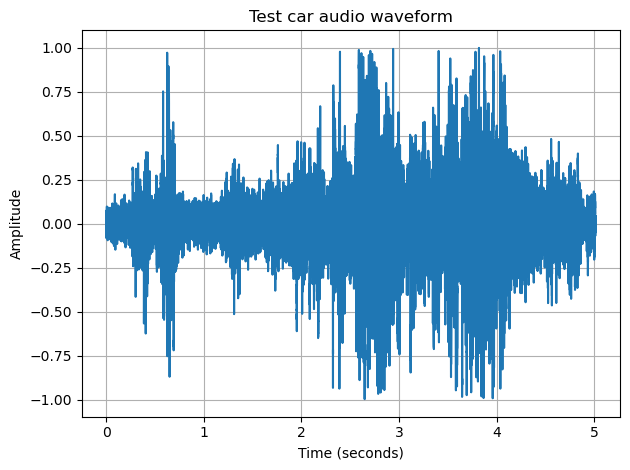

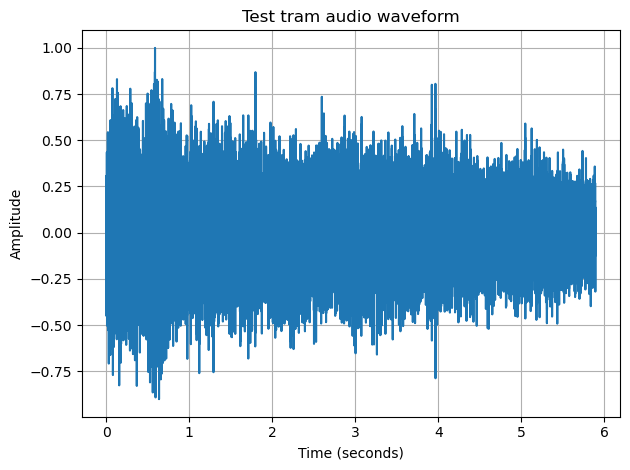

In [16]:
plot_waveform(training_car, sr1, "Training car audio waveform")
plot_waveform(test_car, sr2, "Test car audio waveform")
plot_waveform(test_tram, sr3, "Test tram audio waveform")

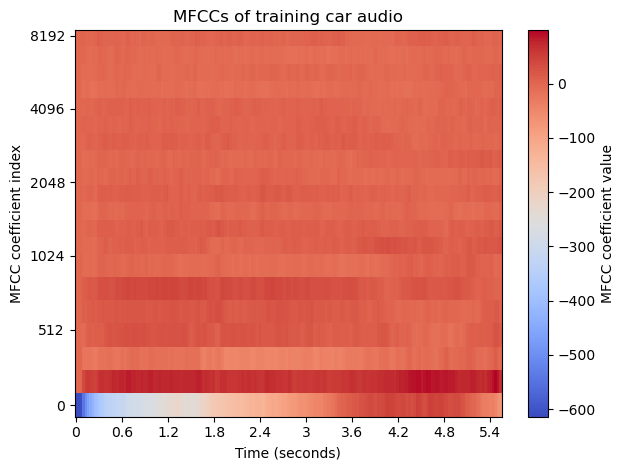

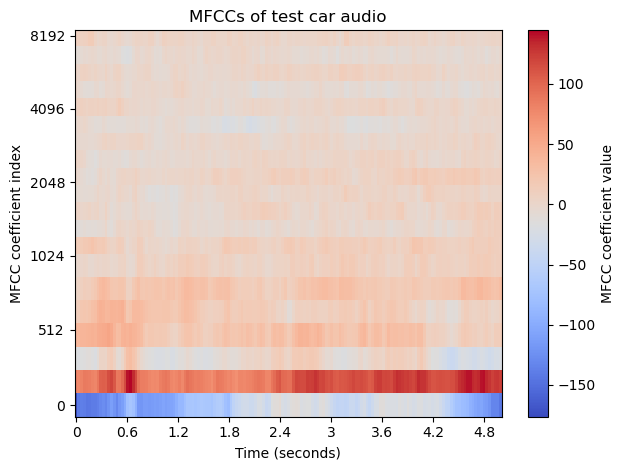

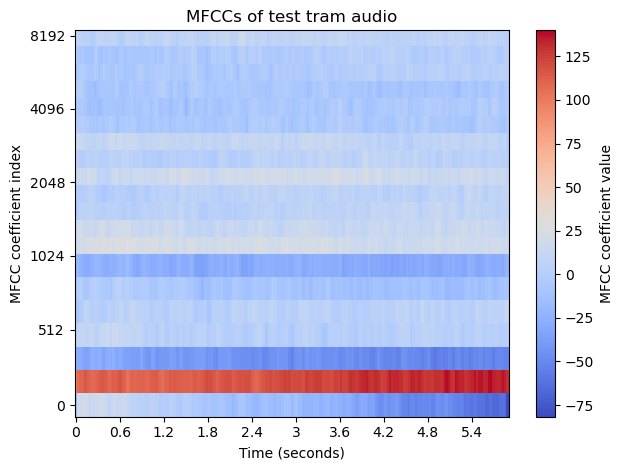

In [14]:
plot_mfcc(training_car, sr1, "MFCCs of training car audio")
plot_mfcc(test_car, sr2, "MFCCs of test car audio")
plot_mfcc(test_tram, sr3, "MFCCs of test tram audio")

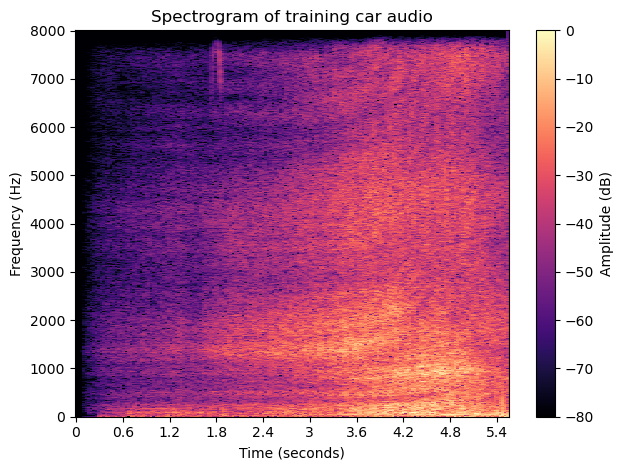

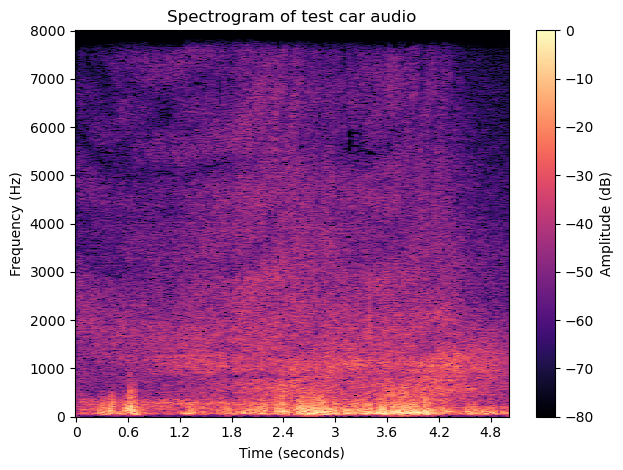

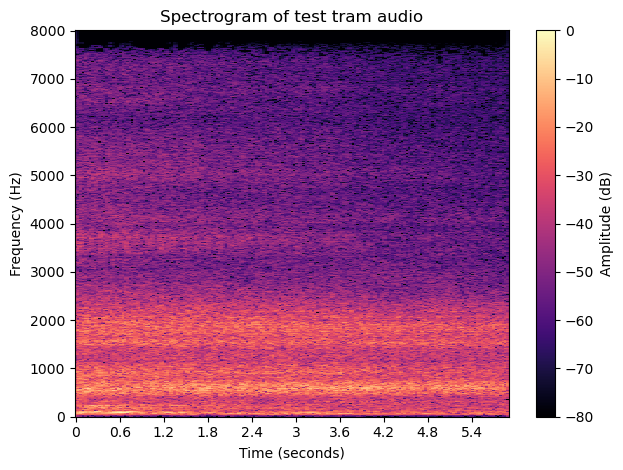

In [20]:
plot_spectrogram(training_car, sr1, "Spectrogram of training car audio")
plot_spectrogram(test_car, sr2, "Spectrogram of test car audio")
plot_spectrogram(test_tram, sr3, "Spectrogram of test tram audio")